Проверка выделения импульсов классификатором

In [1]:
import os
import sys
import glob
from copy import deepcopy
import datetime
import platform

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tqdm import tqdm
from sklearn.externals import joblib

if 'Windows' in platform.platform() and '8.1' in platform.release():
    _ = "C:\\Users\\Andrey\\YandexDisk\\3.Programing\\"
    DATA_DIR = _ + "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    DELIMITER = "\\"

elif 'Windows' in platform.platform() and '7' in platform.release():
    _ = "E:\\Disk.Yandex\\3.Programing\\"
    DATA_DIR = "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    DELIMITER = "\\"

elif 'Windows' in platform.platform() and '10' in platform.release():
    _ = "F:\\YandexDisk\\3.Programing\\"
    DATA_DIR = _ + "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    ALL_DATA = "F:\\YandexDisk\\1.Работа\\Результаты обработки\\"
    DELIMITER = "\\"

elif 'Linux' in platform.platform() and '4.4.0' in platform.release():
    _ = "/home/andr/Yandex.Disk/3.Programing/"
    DATA_DIR = _ + "work/PulseViewer/pulsarsData/"
    PATTERN_DIR = _ + "/work/PulseViewer/frame_of_AP/patterns/"
    PACK_DIR = _ + "myPacks/"
    ALL_DATA = "/home/andr/Yandex.Disk/1.Работа/Результаты обработки/"
    DELIMITER = "/"

else:
    print('unknown system', platform.platform(), platform.release())

sys.path.append(PACK_DIR)
from PRAO import *

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
files_0531 = sorted(
    glob.glob('./final_dataset/' + os.sep + 'obs_data' + os.sep + '*'),
    key=lambda x: datetime.datetime.strptime(os.path.basename(x), '%d.%m.%Y_obs_0531+21.csv'))

In [73]:
file = files_0531[1530]
flat_obs = np.genfromtxt(file, skip_header=7)

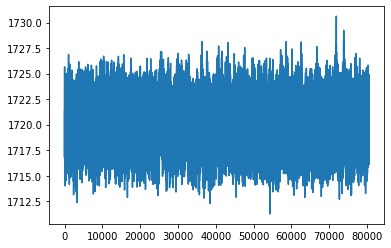

In [74]:
plt.close()
plt.plot(flat_obs)
#plt.xlim(42000, 43000)
plt.show()

In [75]:
test_flat_obser = deepcopy(flat_obs)
med_flux = np.median(test_flat_obser)

In [76]:
loaded_model = joblib.load('dina_model_RFC(1000)_pulse_noise_95.sav')

In [77]:
i = 0
while np.max(test_flat_obser) >= 1730:
    x_max = np.argmax(test_flat_obser)
    pulse = test_flat_obser[x_max - 25: x_max + 125] - med_flux
    if len(pulse) == 0:
        break
        
    n_pulse = pulse/max(pulse)
    
    if len(n_pulse) == 150:
        pass
    else:
        n_pulse = np.append(n_pulse, np.zeros(150 - len(n_pulse)))
    
    NN_decition = loaded_model.predict([n_pulse])
    if NN_decition[0] == 1:
        medias = np.full(len(pulse), med_flux)
        test_flat_obser[x_max - 25: x_max + 125] = medias
        plt.close()
        plt.plot(pulse)
        plt.savefig(f'./final_dataset/gp_plot/{os.path.basename(file)[:-4]}_{i}.png', format='png')
        skip_index.append(x_max)
        i += 1
    else:
        skip_index.append(x_max)
        medias = np.full(len(pulse), med_flux)
        test_flat_obser[x_max - 25: x_max + 125] = medias

In [53]:
len(pulse)

0

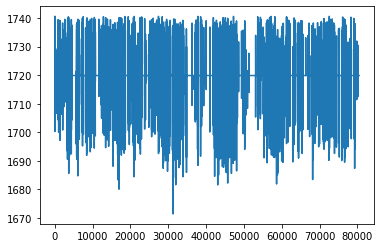

In [52]:
plt.close()
plt.plot(test_flat_obser)
#plt.xlim(75900, 76000)
plt.show()

In [35]:
len(skip_index)

19722

In [36]:
medias

array([1719.85084, 1719.85084, 1719.85084, 1719.85084, 1719.85084,
       1719.85084, 1719.85084, 1719.85084, 1719.85084, 1719.85084,
       1719.85084, 1719.85084, 1719.85084, 1719.85084, 1719.85084,
       1719.85084, 1719.85084, 1719.85084, 1719.85084, 1719.85084,
       1719.85084, 1719.85084, 1719.85084, 1719.85084, 1719.85084,
       1719.85084, 1719.85084, 1719.85084, 1719.85084, 1719.85084,
       1719.85084, 1719.85084, 1719.85084, 1719.85084, 1719.85084,
       1719.85084, 1719.85084, 1719.85084, 1719.85084, 1719.85084,
       1719.85084, 1719.85084, 1719.85084, 1719.85084, 1719.85084,
       1719.85084, 1719.85084, 1719.85084, 1719.85084, 1719.85084,
       1719.85084, 1719.85084, 1719.85084, 1719.85084, 1719.85084,
       1719.85084, 1719.85084, 1719.85084, 1719.85084, 1719.85084,
       1719.85084, 1719.85084, 1719.85084, 1719.85084, 1719.85084,
       1719.85084, 1719.85084, 1719.85084, 1719.85084, 1719.85084,
       1719.85084, 1719.85084, 1719.85084, 1719.85084, 1719.85

In [7]:
x_max = np.argmax(flat_obs)
pulse = flat_obs[x_max - 10: x_max + 90] - med_flux
n_pulse = pulse/max(pulse)
NN_decition = loaded_model.predict([n_pulse])

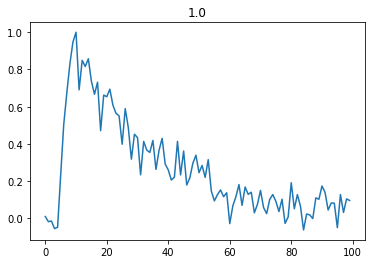

In [8]:
plt.close()
plt.title(NN_decition[0])
plt.plot(n_pulse)
plt.show()

In [40]:
NN_decition[0] == 1

True